In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import json
from IPython.display import display

import pandas as pd

from polarization import get_polarization, get_polarization_by_time
from utils import load_event
from constants import OUTPUT_DIR, EVENTS, FIGURES_DIR

In [10]:
event_polarization = {}

for e in EVENTS:
    data = load_event(e)
    # display(data)
    event_polarization[e] = get_polarization(e, data)

with open(f"{OUTPUT_DIR}/polarization_leaveout.json", 'w') as f:
    json.dump(event_polarization, f)

In [12]:
for e in EVENTS:
    pol_by_day = get_polarization_by_time(e, data, freq="week")
    display(pol_by_day)

    pol_by_day.to_csv(f"{OUTPUT_DIR}/{e}_polarization_by_day.csv")


,pol,random_pol,author_len,time
0,0.500000,0.500000,5,2016-04-03
1,0.500000,0.500000,16,2016-04-10
2,0.500000,0.500000,22,2016-04-17
3,0.500000,0.500000,24,2016-04-24
4,0.500000,0.500000,19,2016-05-01
5,0.500000,0.500000,20,2016-05-08
6,0.500000,0.500000,25,2016-05-15
7,0.500000,0.500000,31,2016-05-22
8,0.483955,0.456944,35,2016-05-29
9,0.494998,0.538709,50,2016-06-05


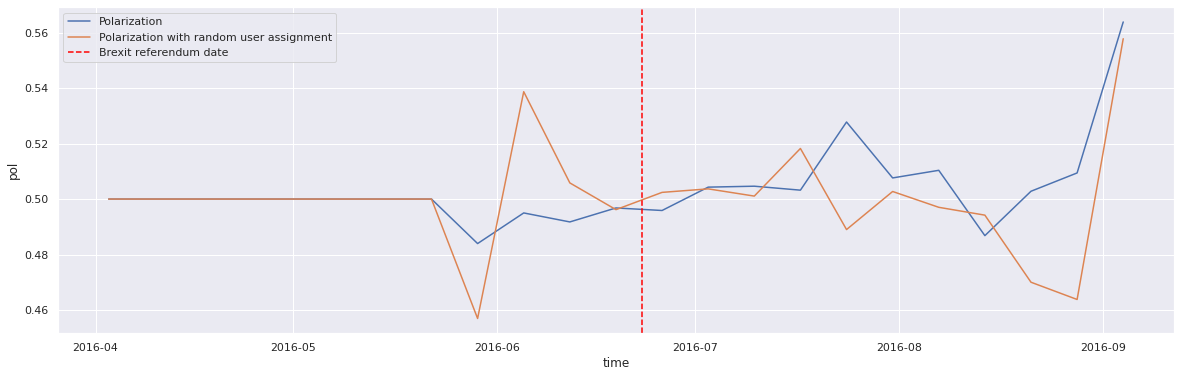

In [14]:
# Plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set(rc={"figure.figsize": (20, 6)})

ax = sns.lineplot(x=pol_by_day.time, y=pol_by_day.pol, label="Polarization")
# sns.lineplot(data=pol_by_day, x="time", y="random_pol", label="Polarization with random user assignment")

# Brexit referendum date: June 23, 2016
BREXIT_DATE = pd.to_datetime("06-23-2016")

plt.axvline(BREXIT_DATE, linestyle="--", color="red", label="Brexit referendum date")
plt.legend()
plt.savefig(
    fname=f"{FIGURES_DIR}/brexit_pol_by_day.pdf",
    bbox_inches='tight', pad_inches=0, format="pdf"
)
plt.show()